In [1]:
!pip install librosa


DEPRECATION: Loading egg at c:\users\vijay\anaconda3\lib\site-packages\cnnclassifier-0.0.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\vijay\anaconda3\lib\site-packages\textsummarizer-0.0.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
import IPython.display as ipd
import librosa
import librosa.display

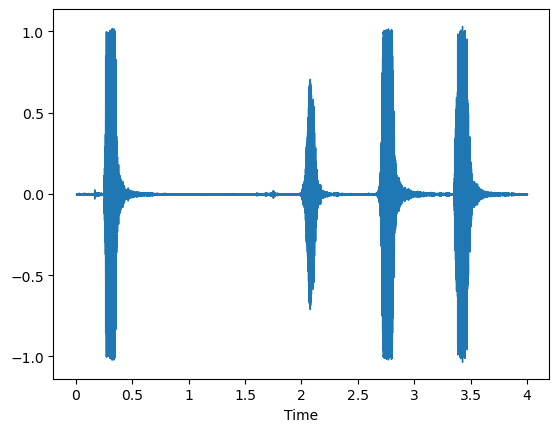

In [88]:
import IPython.display as ipd
# Provide the path to your audio file
filename = 'UrbanSound8K/audio/fold1/72579-3-0-4.wav'
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
# Create the audio player
audio = ipd.Audio(filename)
audio


In [89]:
sample_rate

22050

In [90]:
from scipy.io import wavfile as wav

In [91]:
wave_sample_rate,wave_audio=wav.read(filename)

In [92]:
wave_sample_rate

44100

In [93]:
wave_audio

array([[ -2, 147],
       [ 10, 149],
       [  3, 141],
       ...,
       [-32,  13],
       [ 63,  35],
       [118,  65]], dtype=int16)

In [94]:
data

array([0.00168771, 0.00246057, 0.00223218, ..., 0.00248698, 0.00053287,
       0.00125397], dtype=float32)

In [95]:
import pandas as pd

In [96]:
metadata=pd.read_csv(r"C:\Users\vijay\Downloads\UrbanSound8K\UrbanSound8K\metadata\UrbanSound8K.csv")

In [97]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [98]:
audio_file_data = 'UrbanSound8K/audio/fold5/100263-2-0-3.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(filename)

In [99]:
print(librosa_audio_data)

[0.00168771 0.00246057 0.00223218 ... 0.00248698 0.00053287 0.00125397]


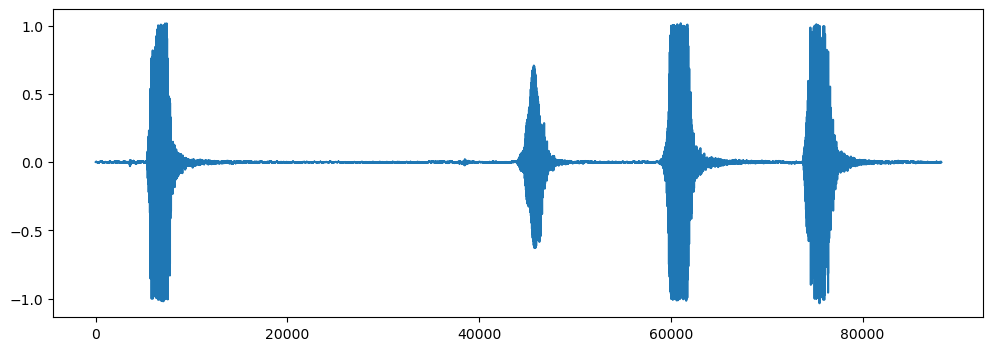

In [100]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)

Observation:
Here librosa converts the signal to mono, meaning the channel will always be 1

In [101]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(audio_file_data)

In [102]:
wave_audio

array([[ 194,  100],
       [ 179,  113],
       [ 160,  124],
       ...,
       [-143,  -87],
       [-134,  -91],
       [-110,  -98]], dtype=int16)

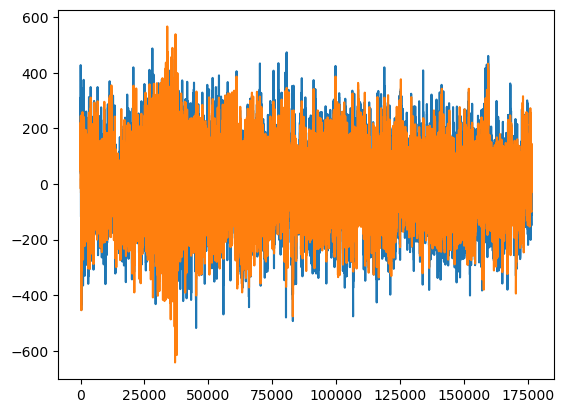

In [103]:
plt.plot(wave_audio)

Extract Features:
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [104]:
mfccs=librosa.feature.mfcc(y=librosa_audio_data,sr=librosa_sample_rate,n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [105]:
mfccs

array([[-4.8318375e+02, -4.6895856e+02, -4.6421457e+02, ...,
        -4.5042596e+02, -4.5491953e+02, -4.6992148e+02],
       [ 2.1044891e+01,  2.6349976e+01,  3.4165962e+01, ...,
         4.1902046e+01,  3.8747250e+01,  2.8437790e+01],
       [ 1.9997375e+01,  9.8234777e+00,  1.6595417e+01, ...,
        -3.0096951e+00, -1.5258454e-01,  7.7437372e+00],
       ...,
       [ 1.6563592e+00,  1.5022916e+00,  2.2412846e+00, ...,
        -1.4179869e+00, -2.0652646e-01, -2.7443358e-01],
       [ 1.9972489e+00, -1.2223206e+00, -6.2991738e-02, ...,
         1.0763631e+00,  2.2778001e+00,  3.3145990e+00],
       [ 2.2995210e+00,  1.0326670e-01, -2.0412788e-01, ...,
         3.0377073e+00,  2.6299529e+00,  3.4360237e+00]], dtype=float32)

In [106]:
import pandas as pd
import os
import librosa
audio_dataset_path='UrbanSound8K/UrbanSound8K/audio/'
metadata=pd.read_csv(r"C:\Users\vijay\Downloads\UrbanSound8K\UrbanSound8K\metadata\UrbanSound8K.csv")
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [107]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [108]:
!pip install resampy
!pip install --upgrade librosa

DEPRECATION: Loading egg at c:\users\vijay\anaconda3\lib\site-packages\cnnclassifier-0.0.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\vijay\anaconda3\lib\site-packages\textsummarizer-0.0.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


DEPRECATION: Loading egg at c:\users\vijay\anaconda3\lib\site-packages\cnnclassifier-0.0.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\vijay\anaconda3\lib\site-packages\textsummarizer-0.0.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [109]:
import resampy
import librosa


In [110]:
print(resampy.__version__)
print(librosa.__version__)


0.4.2
0.10.1


In [111]:
import os
import pandas as pd
import numpy as np 
import librosa



# Function to extract features
def extract_features(file_path):
    try:
        audio_data, sr = librosa.load(file_path, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=40)
        mfccs_mean = np.mean(mfccs.T, axis=0)
        return mfccs_mean
    except Exception as e:
        print(f"Error encountered while parsing {file_path}: {e}")
        return None

# Folder containing audio files
audio_dataset_path = 'UrbanSound8K/UrbanSound8K/audio' 

# Extract features for each audio file
extracted_features = []
for index, row in metadata.iterrows():
    file_path = os.path.join(audio_dataset_path, f"fold{row['fold']}", row['slice_file_name'])
    features = extract_features(file_path)
    if features is not None:
        extracted_features.append([features, row['class']])

# Convert to DataFrame
feature_df = pd.DataFrame(extracted_features, columns=['features', 'class'])

# Save extracted features to a CSV file
feature_df.to_csv('extracted_features.csv', index=False)  

C:\Users\vijay\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
C:\Users\vijay\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\vijay\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


In [112]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.52066, 52.00812, -...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402214, 60.302044,...",children_playing


In [113]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [114]:
X.shape

(8732, 40)

In [115]:
### Label Encoding
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [117]:
### No of classes
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
from tensorflow.keras.utils import to_categorical
y=to_categorical(labelencoder.fit_transform(y))
num_labels=y.shape[1]

In [118]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [119]:
y.shape

(8732, 10)

In [120]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [121]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665260e+00, -1.36902380e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305080e+00, -5.27745295e+00, -1.55697155e+00],
       [-4.98715439e+01,  2.65352815e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920465e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939763e+00, ...,
         7.42641270e-01,  7.33490884e-01,  7.11009145e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         1.46811950e+00, -2.00917006e+00, -8.82181704e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066067e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651139e+00]], dtype=float32)

In [122]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [123]:
X_train.shape

(6985, 40)

In [124]:
X_test.shape

(1747, 40)

In [125]:
y_train.shape

(6985, 10)

In [126]:
y_test.shape

(1747, 10)

In [127]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [129]:
from keras.layers import Dense

# Example usage of Dense layer
dense_layer = Dense(units=64, activation='relu', input_shape=(100,))

In [130]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [131]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 100)               4100      
                                                                 
 activation_15 (Activation)  (None, 100)               0         
                                                                 
 dropout_12 (Dropout)        (None, 100)               0         
                                                                 
 dense_21 (Dense)            (None, 200)               20200     
                                                                 
 activation_16 (Activation)  (None, 200)               0         
                                                                 
 dropout_13 (Dropout)        (None, 200)               0         
                                                                 
 dense_22 (Dense)            (None, 100)              

In [132]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [166]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
219/219 [==============================] - ETA: 0s - loss: 0.7679 - accuracy: 0.7487
Epoch 1: val_loss improved from inf to 0.62945, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 9ms/step - loss: 0.7679 - accuracy: 0.7487 - val_loss: 0.6294 - val_accuracy: 0.8191
Epoch 2/100
216/219 [============================>.] - ETA: 0s - loss: 0.7768 - accuracy: 0.7470
Epoch 2: val_loss did not improve from 0.62945
219/219 [==============================] - 2s 8ms/step - loss: 0.7761 - accuracy: 0.7469 - val_loss: 0.6687 - val_accuracy: 0.7974
Epoch 3/100
215/219 [============================>.] - ETA: 0s - loss: 0.7895 - accuracy: 0.7465
Epoch 3: val_loss did not improve from 0.62945
219/219 [==============================] - 1s 6ms/step - loss: 0.7928 - accuracy: 0.7469 - val_loss: 0.6332 - val_accuracy: 0.8008
Epoch 4/100
215/219 [============================>.] - ETA: 0s - loss: 0.7582 - accuracy: 0.7535
Epoch 4: val_loss did 

Epoch 30/100
214/219 [============================>.] - ETA: 0s - loss: 0.7530 - accuracy: 0.7507
Epoch 30: val_loss did not improve from 0.61748
219/219 [==============================] - 1s 6ms/step - loss: 0.7586 - accuracy: 0.7502 - val_loss: 0.6439 - val_accuracy: 0.8111
Epoch 31/100
214/219 [============================>.] - ETA: 0s - loss: 0.7599 - accuracy: 0.7488
Epoch 31: val_loss did not improve from 0.61748
219/219 [==============================] - 1s 6ms/step - loss: 0.7588 - accuracy: 0.7486 - val_loss: 0.6367 - val_accuracy: 0.8145
Epoch 32/100
219/219 [==============================] - ETA: 0s - loss: 0.7591 - accuracy: 0.7492
Epoch 32: val_loss did not improve from 0.61748
219/219 [==============================] - 2s 11ms/step - loss: 0.7591 - accuracy: 0.7492 - val_loss: 0.6479 - val_accuracy: 0.8088
Epoch 33/100
217/219 [============================>.] - ETA: 0s - loss: 0.7824 - accuracy: 0.7491
Epoch 33: val_loss did not improve from 0.61748
219/219 [=============

211/219 [===========================>..] - ETA: 0s - loss: 0.7708 - accuracy: 0.7430
Epoch 59: val_loss did not improve from 0.60687
219/219 [==============================] - 1s 6ms/step - loss: 0.7668 - accuracy: 0.7443 - val_loss: 0.6295 - val_accuracy: 0.8100
Epoch 60/100
219/219 [==============================] - ETA: 0s - loss: 0.7440 - accuracy: 0.7566
Epoch 60: val_loss did not improve from 0.60687
219/219 [==============================] - 1s 6ms/step - loss: 0.7440 - accuracy: 0.7566 - val_loss: 0.6335 - val_accuracy: 0.8071
Epoch 61/100
217/219 [============================>.] - ETA: 0s - loss: 0.7382 - accuracy: 0.7579
Epoch 61: val_loss did not improve from 0.60687
219/219 [==============================] - 1s 6ms/step - loss: 0.7398 - accuracy: 0.7579 - val_loss: 0.6133 - val_accuracy: 0.8226
Epoch 62/100
216/219 [============================>.] - ETA: 0s - loss: 0.7834 - accuracy: 0.7464
Epoch 62: val_loss did not improve from 0.60687
219/219 [===========================

Epoch 89/100
214/219 [============================>.] - ETA: 0s - loss: 0.7640 - accuracy: 0.7535
Epoch 89: val_loss did not improve from 0.60687
219/219 [==============================] - 1s 6ms/step - loss: 0.7624 - accuracy: 0.7540 - val_loss: 0.6299 - val_accuracy: 0.8140
Epoch 90/100
211/219 [===========================>..] - ETA: 0s - loss: 0.7442 - accuracy: 0.7616
Epoch 90: val_loss did not improve from 0.60687
219/219 [==============================] - 1s 6ms/step - loss: 0.7436 - accuracy: 0.7615 - val_loss: 0.6194 - val_accuracy: 0.8054
Epoch 91/100
216/219 [============================>.] - ETA: 0s - loss: 0.7692 - accuracy: 0.7483
Epoch 91: val_loss did not improve from 0.60687
219/219 [==============================] - 1s 6ms/step - loss: 0.7703 - accuracy: 0.7492 - val_loss: 0.6357 - val_accuracy: 0.8071
Epoch 92/100
210/219 [===========================>..] - ETA: 0s - loss: 0.7414 - accuracy: 0.7640
Epoch 92: val_loss did not improve from 0.60687
219/219 [==============

In [167]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8116771578788757


In [168]:
X_test[1]

array([-466.17957   ,    1.0950246 ,  -34.01389   ,   35.33935   ,
        -14.88148   ,  -19.12843   ,   -0.581684  ,  -16.130577  ,
        -21.339075  ,    7.673635  ,  -29.16449   ,  -18.950253  ,
         -2.9579995 ,   -8.162331  ,  -15.153101  ,   -6.6048055 ,
         -7.5685973 ,    9.340646  ,   14.4331    ,   21.934181  ,
         20.861397  ,    1.3340123 ,  -19.228804  ,   -4.630231  ,
         -1.0564744 ,    3.215267  ,   -6.984281  ,  -16.414577  ,
        -10.0286455 ,   13.009954  ,    0.53346074,  -23.843391  ,
        -15.267321  ,    9.245734  ,   10.367627  ,   -0.583201  ,
         -1.2624055 ,   17.700016  ,   13.847462  ,   -5.1862826 ],
      dtype=float32)

In [172]:
filename="UrbanSound8K/UrbanSound8K/audio/fold4/61790-9-1-20.wav"
audio, sample_rate=librosa.load(filename,res_type='kaiser_fast')
mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)
print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label = np.argmax(model.predict(mfccs_scaled_features), axis=-1)
prediction_class=labelencoder.inverse_transform(predicted_label)
prediction_class

[-2.2769398e+02  1.6527559e+02 -1.4216052e+01  1.4298320e+01
 -1.9468807e+01 -2.1301472e-01 -1.1764846e+01 -5.2505264e+00
 -9.2302933e+00 -5.6392236e+00 -1.2504615e+01 -3.2912347e+00
 -1.6437546e+01 -2.8813634e+00 -5.1479688e+00 -1.1508021e+00
 -7.0535502e+00 -2.0471628e+00  3.7010114e+00  8.8160925e+00
  5.4008598e+00 -1.9241384e+00  7.6210505e-01  2.6391346e+00
  3.6347392e+00 -4.7324071e+00 -9.1581039e+00 -4.3953772e+00
 -1.0772158e-01 -3.2510486e+00  3.3086628e-01 -9.7773291e-02
 -9.1014344e-01 -7.5125628e+00 -4.0900059e+00 -1.4452622e+00
 -2.6719604e+00 -1.7718517e+00 -5.4311430e-01  6.1283340e+00]
[[-2.2769398e+02  1.6527559e+02 -1.4216052e+01  1.4298320e+01
  -1.9468807e+01 -2.1301472e-01 -1.1764846e+01 -5.2505264e+00
  -9.2302933e+00 -5.6392236e+00 -1.2504615e+01 -3.2912347e+00
  -1.6437546e+01 -2.8813634e+00 -5.1479688e+00 -1.1508021e+00
  -7.0535502e+00 -2.0471628e+00  3.7010114e+00  8.8160925e+00
   5.4008598e+00 -1.9241384e+00  7.6210505e-01  2.6391346e+00
   3.6347392e+00 

array(['street_music'], dtype='<U16')